# Natural Adversarial Objects Detection using Swin Transformer

## Part 1 - Data processing

-------------------------------------

Although state-of-the-art object detection methods have shown compelling performance, models often are not robust to adversarial attacks. A new dataset has been released, **Natural Adversarial Objects (NAO)**, to test the robustness of object detection models against edge cases and out-of-distribution images.

<figure align="center">
    <p>
    <img style="width: 1500px" src='https://production-media.paperswithcode.com/datasets/d9481181-6863-499f-9bd0-2ab87e897437.png' />
    </p>
    <figcaption>Sample images from NAO where EfficientDet-D7 produces high confidence false positives and egregious classification</figcaption>
</figure>

When evaluated on the NAO dataset instead of the standard MSCOCO validation set, some detection models experience a significant drop in their mean average precision (mAP), ranging from *40-74%*

| Model              | Params | mAP on MSCOCO | mAP on NAO |
|--------------------|-------:|--------------:|-----------:|
| Faster RCNN        |   42M  |          21.5 |       13.5 |
| RetinaNet-R50      |   34M  |          39.2 |       11.1 |
| YOLOv3             |   62M  |          33.0 |       10.0 |
| EfficientDet-D2    |  8.1M  |          43.9 |       12.8 |
| EfficientDet-D4    |   21M  |          49.7 |       15.0 |
| EfficientDet-D7    |   52M  |          53.7 |       13.6 |



Firstly, let's download the [dataset](https://drive.google.com/drive/folders/15P8sOWoJku6SSEiHLEts86ORfytGezi8) for natural adversarial objects detection

After we downloaded and extracted, so we will have the following structure:

    Natural Adversarial Objects/
    |-- CHANGELOG
    |-- images
        |-- *.jpg
    |-- annotations
        |-- instances_all.json
        |-- instances_test.json
        |-- instances_train.json
        `-- instances_validation.json
    `-- datasheet_for_dataset.tex


The format of annotation files have already followed the COCO format, but the image sets have not been divided into separate folders `train`, `valdation`, and `test`.


In [7]:
import os
import json
import shutil
from tqdm import tqdm
import numpy as np


def split_dataset_based_on_annotation(root='./Natural Adversarial Objects', des='./coco-natural-adversarial-objects'):
    src_images = os.path.join(root, 'images')
    src_annotation = os.path.join(root, 'annotations')

    des_images = os.path.join(des, 'images')
    des_annotation = os.path.join(des, 'annotations')

    for annotation_file in os.listdir(src_annotation):
        if annotation_file == 'instances_all.json':
            continue

        # get dir name (ex: train, validation, test)
        sub_des_images = annotation_file.split('.')[0].split('_')[-1]
        sub_des_images = os.path.join(des_images, sub_des_images)

        # create directory
        if not os.path.exists(sub_des_images):
            os.makedirs(sub_des_images)

        print(f'Copying images to {sub_des_images}...')
        with open(os.path.join(src_annotation, annotation_file)) as file:
            data = json.load(file)

            for image in tqdm(data['images']):
                file_name = image['file_name']
                shutil.copy(os.path.join(src_images,file_name), os.path.join(sub_des_images, file_name))
        
        print(f'Copying {annotation_file}')
        if not os.path.exists(des_annotation):
            os.makedirs(des_annotation)
        shutil.copy(os.path.join(src_annotation, annotation_file), os.path.join(des_annotation, annotation_file))

split_dataset_based_on_annotation()

Copying images to ./coco-natural-adversarial-objects/images/validation...


100%|██████████| 373/373 [00:00<00:00, 5242.46it/s]


Copying instances_validation.json
Copying images to ./coco-natural-adversarial-objects/images/test...


100%|██████████| 367/367 [00:00<00:00, 4898.86it/s]

Copying instances_test.json
Copying images to ./coco-natural-adversarial-objects/images/train...



100%|██████████| 7196/7196 [00:02<00:00, 2581.08it/s]


Copying instances_train.json


Now, we have the dataset that followed COCO format. Let visualize some images

In [2]:
import json
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cv2


def visualize_image(path_image='coco-natural-adversarial-objects/images/test/ab116729a189a203.jpg', path_annotation='coco-natural-adversarial-objects/annotations/instances_test.json'):

    # Load the COCO annotation file
    with open(path_annotation, 'r') as f:
        data = json.load(f)

    # Load the image using PIL
    img = cv2.imread(path_image)

    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(12, 12))

    # Create a mapping between category IDs and category names
    id_to_name = {}
    for category in data['categories']:
        id_to_name[category['id']] = category['name']

    image_id = path_image.split('/')[-1].split('.')[0]

    # Loop over each object annotation in the COCO data
    for annotation in data['annotations']:

        if annotation['_image_id'] != image_id:
            continue

        # Get the bounding box coordinates
        x, y, w, h = annotation['bbox']

        # Get the category id for the object
        category_id = annotation['category_id']

        # Get the category name from the mapping dictionary
        category_name = id_to_name[category_id]

        # Create a rectangle patch for the object
        rect = Rectangle((x, y), w, h, fill=False, edgecolor='red')

        # Add the rectangle patch to the axis
        ax.add_patch(rect)

        # Add the category label to the rectangle
        ax.text(x, y - 10, category_name, color='red')

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    # Display the image with object annotations
    ax.imshow(img)
    plt.show()


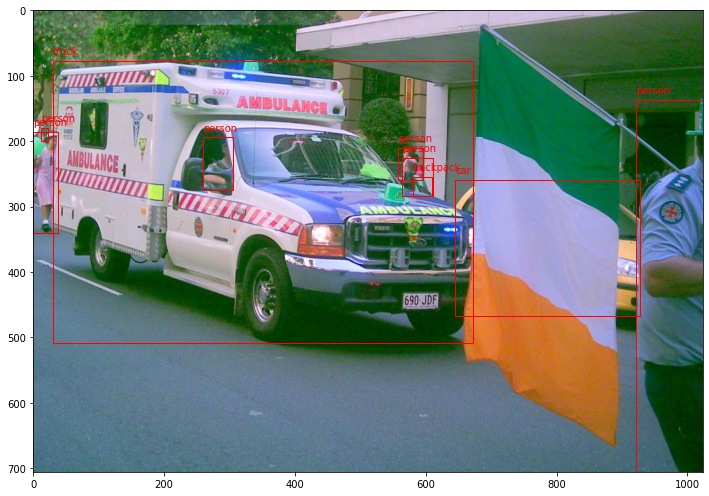

In [4]:
visualize_image(path_image='coco-natural-adversarial-objects/images/test/ab116729a189a203.jpg',
                path_annotation='coco-natural-adversarial-objects/annotations/instances_test.json')


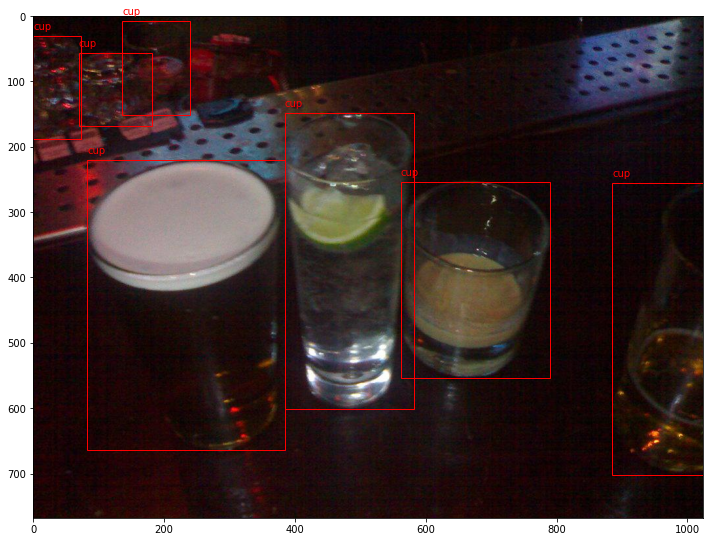

In [13]:
visualize_image(path_image='coco-natural-adversarial-objects/images/test/dc02f5bba92b19a2.jpg',
                path_annotation='coco-natural-adversarial-objects/annotations/instances_test.json')


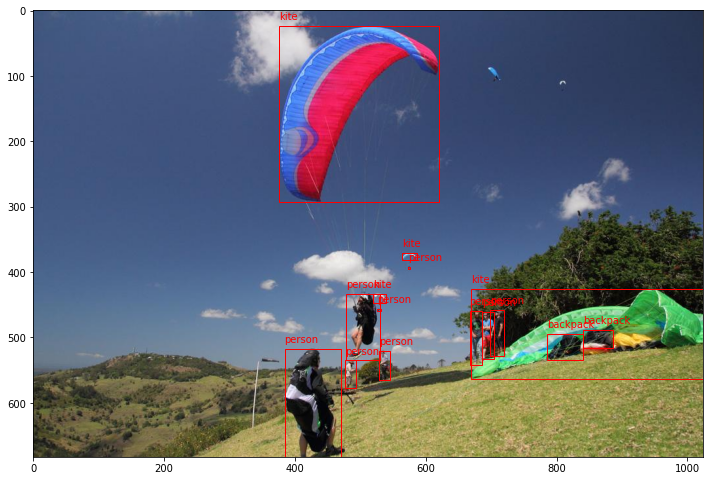

In [14]:
visualize_image(path_image='coco-natural-adversarial-objects/images/test/afa5c9fa0d2c7fde.jpg',
                path_annotation='coco-natural-adversarial-objects/annotations/instances_test.json')


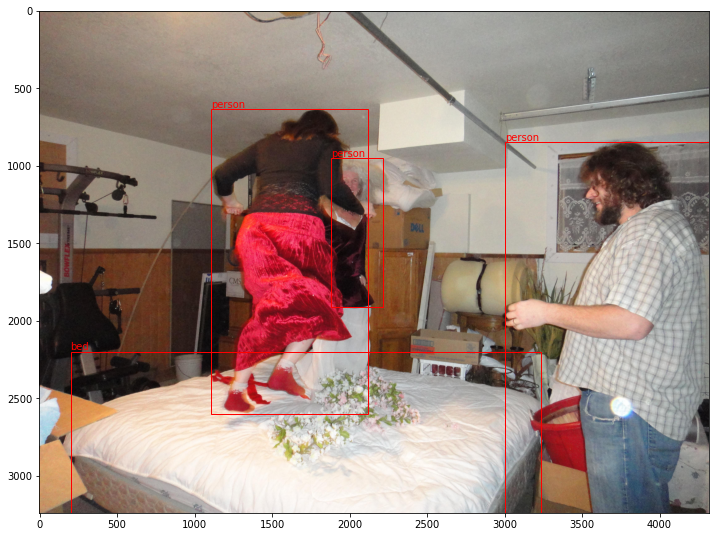

In [2]:
visualize_image(path_image='coco-natural-adversarial-objects/images/train/1d86d51500da65de.jpg',
                path_annotation='coco-natural-adversarial-objects/annotations/instances_train.json')


In [ ]:
%cd coco-natural-adversarial-objects
!zip -r natural-adversarial-objects.zip *